In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Credit_Risk_Dataset_Onyx_Data_September_25.xlsx')
df.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,...,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,...,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,...,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,...,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [3]:
df.columns

Index(['client_ID', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'gender',
       'marital_status', 'education_level', 'country', 'state', 'city',
       'city_latitude', 'city_longitude', 'employment_type',
       'loan_term_months', 'loan_to_income_ratio', 'other_debt',
       'debt_to_income_ratio', 'open_accounts', 'credit_utilization_ratio',
       'past_delinquencies'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_ID                   32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  object 
 12  cb_person_cred_hist_length  32581 non-null  int64  
 13  gender                      325

In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,city_latitude,city_longitude,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211,45.407613,-63.805473,38.501581,0.170553,1.156796e+04,0.345208,8.042018,0.499884,0.505141
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001,7.644809,46.615580,16.012441,0.107049,1.306093e+04,0.129406,4.328087,0.259530,0.711745
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,29.760400,-123.365600,12.000000,0.000789,2.252074e+02,0.064502,0.000000,0.050001,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,40.712800,-96.797000,24.000000,0.089655,5.387168e+03,0.251236,4.000000,0.275358,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,46.813900,-75.697200,36.000000,0.148148,8.995071e+03,0.333188,8.000000,0.500289,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000,51.507400,-3.943600,60.000000,0.229167,1.456293e+04,0.423142,12.000000,0.725056,1.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,55.953300,-0.127800,60.000000,0.830000,1.187999e+06,1.053888,15.000000,0.949998,6.000000


In [6]:
df.shape

(32581, 29)

In [7]:
df.isnull().sum()

client_ID                        0
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
gender                           0
marital_status                   0
education_level                  0
country                          0
state                            0
city                             0
city_latitude                    0
city_longitude                   0
employment_type                  0
loan_term_months                 0
loan_to_income_ratio             0
other_debt                       0
debt_to_income_ratio             0
open_accounts                    0
credit_utilization_ratio         0
past_delinquencies  

In [8]:
import math

df['emp_length_missing'] = df['person_emp_length'].isna().astype(int)
df['person_emp_length'] = df['person_emp_length'].fillna(round(df['person_emp_length'].mean()))

In [9]:
# Step 1: Create missingness flag
df['loan_int_rate_missing'] = df['loan_int_rate'].isna().astype(int)

In [10]:
# Step 2: Compute median interest rate per loan_grade
median_rate_by_grade = df.groupby('loan_grade')['loan_int_rate'].median()
median_rate_by_grade

loan_grade
A     7.490
B    10.990
C    13.480
D    15.310
E    16.820
F    18.535
G    20.160
Name: loan_int_rate, dtype: float64

In [11]:
# Step 3: Map each loan_grade to its median rate, then fill missing values
df['loan_int_rate'] = df['loan_int_rate'].fillna(
    df['loan_grade'].map(median_rate_by_grade)
)

df['loan_int_rate']

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [12]:
# Step 4: Round to 2 decimal places
df['loan_int_rate'] = df['loan_int_rate'].round(2)


In [13]:
df.isnull().sum()

client_ID                     0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
gender                        0
marital_status                0
education_level               0
country                       0
state                         0
city                          0
city_latitude                 0
city_longitude                0
employment_type               0
loan_term_months              0
loan_to_income_ratio          0
other_debt                    0
debt_to_income_ratio          0
open_accounts                 0
credit_utilization_ratio      0
past_delinquencies            0
emp_length_missing            0
loan_int_rate_missing         0
dtype: i

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop(columns = ['client_ID','city_latitude','city_longitude'])
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies,emp_length_missing,loan_int_rate_missing
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0,0,0


In [16]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'gender',
 'marital_status',
 'education_level',
 'country',
 'state',
 'city',
 'employment_type']

In [17]:
df_encoded = pd.get_dummies(df,columns=categorical_cols,drop_first=True)
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_term_months,loan_to_income_ratio,...,city_Ottawa,city_Quebec City,city_San Francisco,city_Swansea,city_Toronto,city_Vancouver,city_Victoria,employment_type_Part-time,employment_type_Self-employed,employment_type_Unemployed
0,22,59000,123.0,35000,16.02,1,0.59,3,36,0.593220,...,False,False,False,False,True,False,False,False,True,False
1,21,9600,5.0,1000,11.14,0,0.10,2,36,0.104167,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,36,0.572917,...,False,False,False,True,False,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,12,0.534351,...,False,False,False,False,False,True,False,True,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,36,0.643382,...,False,False,False,False,False,False,False,True,False,False


In [18]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =42)

In [21]:
from sklearn.linear_model import LogisticRegression    

In [22]:
log = LogisticRegression(solver='liblinear', max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [23]:
y_pred = log.predict(X_test)

In [24]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
accuracy = accuracy_score(y_test, y_pred)

In [25]:
y_proba = log.predict_proba(X_test)[:, 1]   # probability of default

In [26]:
# Evaluate the model
metrics = {
    'Accuracy' : accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall'   : recall_score(y_test, y_pred),
    'F1'       : f1_score(y_test, y_pred),
    'ROC-AUC'  : roc_auc_score(y_test, y_proba)
}
metrics

{'Accuracy': 0.8164705882352942,
 'Precision': 0.7414698162729659,
 'Recall': 0.26133209990749307,
 'F1': 0.38645690834473323,
 'ROC-AUC': 0.8073623517297752}

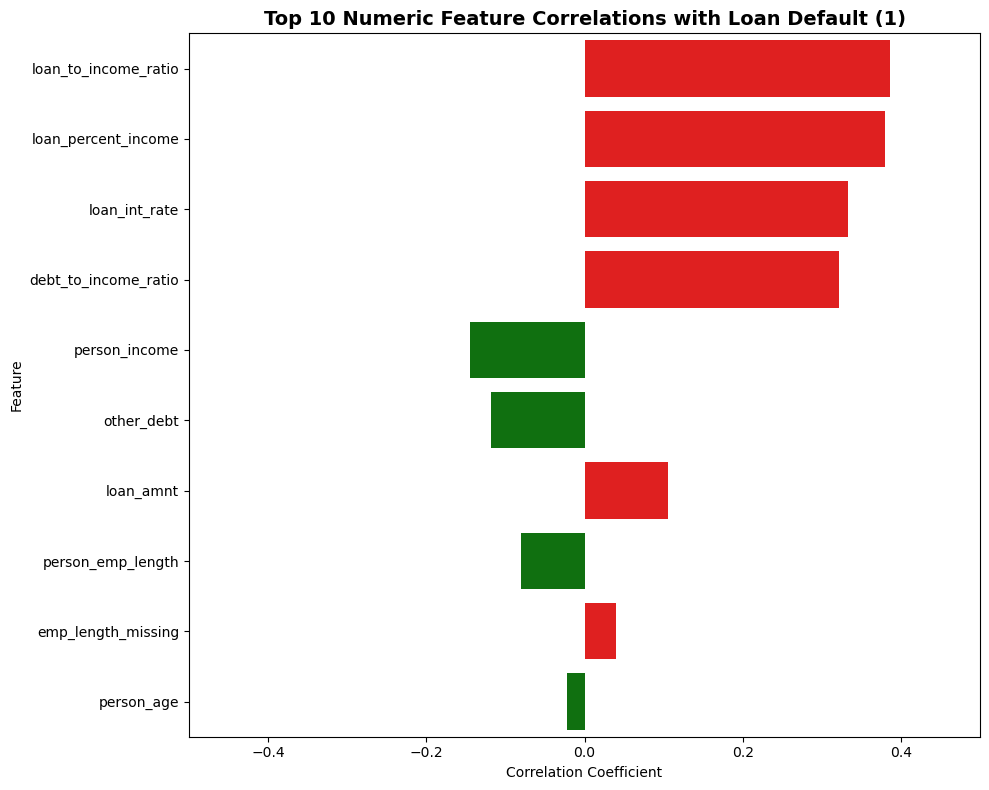


NUMERIC FEATURES RANKED BY CORRELATION WITH DEFAULT (Top 15)
Rank Feature                         Correlation              Direction
----------------------------------------------------------------------
1    loan_to_income_ratio                 0.3859 Positive (Higher = Riskier)
2    loan_percent_income                  0.3794 Positive (Higher = Riskier)
3    loan_int_rate                        0.3337 Positive (Higher = Riskier)
4    debt_to_income_ratio                 0.3215 Positive (Higher = Riskier)
5    person_income                       -0.1444 Negative (Higher = Safer)
6    other_debt                          -0.1183 Negative (Higher = Safer)
7    loan_amnt                            0.1054 Positive (Higher = Riskier)
8    person_emp_length                   -0.0806 Negative (Higher = Safer)
9    emp_length_missing                   0.0394 Positive (Higher = Riskier)
10   person_age                          -0.0216 Negative (Higher = Safer)
11   cb_person_cred_hist_length  

In [56]:
# Drop non-feature columns
df = df.drop(columns = ['country','state','city'])

# --- 3. Select Numeric Features & Prepare for Correlation ---
# Automatically select all numerical columns remaining in the DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'loan_status' in numeric_cols:
    numeric_cols.remove('loan_status')
    
df_numeric = df[numeric_cols + ['loan_status']].copy()

# --- 4. Compute Correlation with Default ---
# Find correlation with 'loan_status', drop the 'loan_status' row itself, 
# and sort by the absolute value (strength) of the correlation.
correlations = df_numeric.corr()['loan_status'].drop('loan_status').sort_values(key=abs, ascending=False)


# --- 5. Simplified Visualization: Single Horizontal Bar Plot ---
plt.figure(figsize=(10, 8))
top_10_corr = correlations.head(10)

# Use color to indicate positive (riskier) or negative (safer) correlation
sns.barplot(
    x=top_10_corr.values, 
    y=top_10_corr.index, 
    palette=['red' if x > 0 else 'green' for x in top_10_corr.values]
)

plt.title('Top 10 Numeric Feature Correlations with Loan Default (1)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-0.5, 0.5)
plt.tight_layout()
plt.show()

# --- 6. Print Ranked Table ---
print("\n" + "="*70)
print("NUMERIC FEATURES RANKED BY CORRELATION WITH DEFAULT (Top 15)")
print("="*70)
print(f"{'Rank':<4} {'Feature':<30} {'Correlation':>12} {'Direction':>22}")
print("-" * 70)
for i, (feat, corr) in enumerate(correlations.items(), 1):
    direction = "Positive (Higher = Riskier)" if corr > 0 else "Negative (Higher = Safer)"
    print(f"{i:<4} {feat:<30} {corr:>12.4f} {direction:>22}")
    if i >= 15:
        break

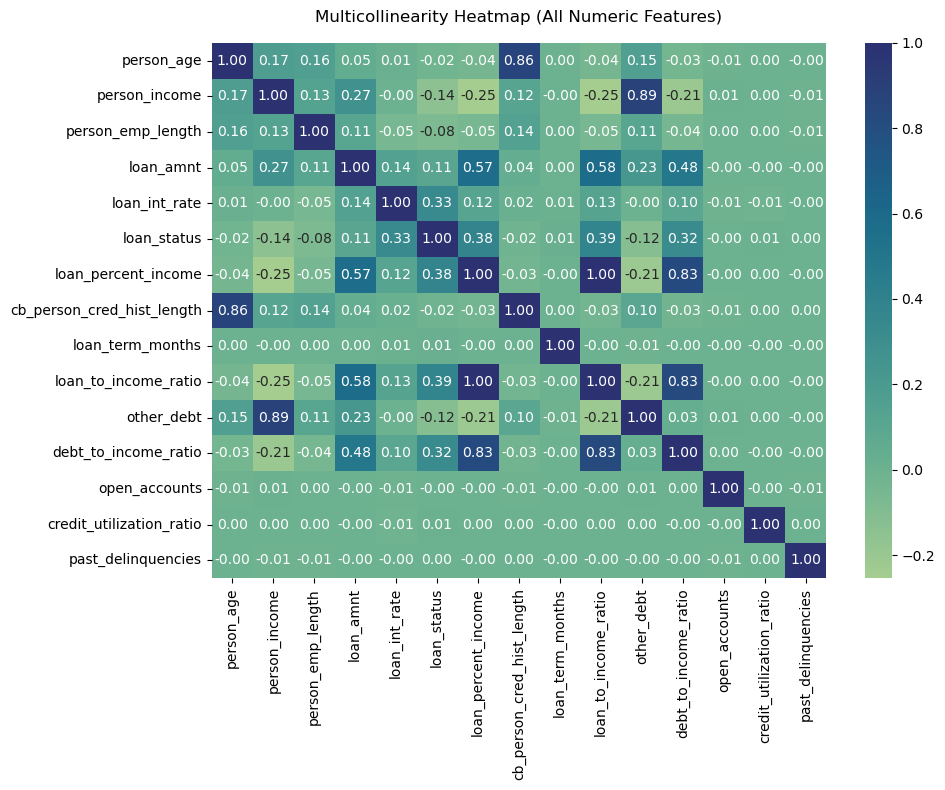


=== ALL PAIRWISE CORRELATIONS (Multicollinearity) ===
#    Feature 1                      Feature 2                          Corr              Direction
----------------------------------------------------------------------------------------------
1    person_income                  person_age                       0.1732 Positive (same direction)
2    person_emp_length              person_age                       0.1611 Positive (same direction)
3    person_emp_length              person_income                    0.1329 Positive (same direction)
4    loan_amnt                      person_age                       0.0508 Positive (same direction)
5    loan_amnt                      person_income                    0.2668 Positive (same direction)
6    loan_amnt                      person_emp_length                0.1112 Positive (same direction)
7    loan_int_rate                  person_age                       0.0125 Positive (same direction)
8    loan_int_rate                  p

In [60]:

# ------------------------------------------------------------------
# 2. Numeric columns (including target)
# ------------------------------------------------------------------
numerical_df = [
    'person_age','person_income','person_emp_length','loan_amnt',
    'loan_int_rate','loan_status','loan_percent_income',
    'cb_person_cred_hist_length','loan_term_months',
    'loan_to_income_ratio','other_debt','debt_to_income_ratio',
    'open_accounts','credit_utilization_ratio','past_delinquencies'
]

df_num = df[numerical_df].copy()

# ------------------------------------------------------------------
# 3. Correlation matrix (full pairwise)
# ------------------------------------------------------------------
correlation_matrix = df_num.corr()

# ------------------------------------------------------------------
# 4. Heatmap – EXACTLY your code
# ------------------------------------------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='crest')
plt.title('Multicollinearity Heatmap (All Numeric Features)', pad=15)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 5. Print ALL pairwise correlations with direction
# ------------------------------------------------------------------
print("\n=== ALL PAIRWISE CORRELATIONS (Multicollinearity) ===")
print(f"{'#':<4} {'Feature 1':<30} {'Feature 2':<30} {'Corr':>8} {'Direction':>22}")
print("-" * 94)

idx = 1
for col1 in corr_pairs.columns:
    for col2 in corr_pairs.index:
        if pd.notna(corr_pairs.loc[col2, col1]):
            corr = corr_pairs.loc[col2, col1]
            direction = "Positive (same direction)" if corr > 0 else "Negative (opposite direction)"
            print(f"{idx:<4} {col1:<30} {col2:<30} {corr:>8.4f} {direction:>22}")
            idx += 1

print(f"\nTotal unique pairwise correlations: {idx-1}")